## Classifier Comparison

In this notebook, we compare some of traditional machine learning algorithms on movie review datasets. 

In [1]:
import sys, argparse
sys.path.append('..')
import helper
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### 1. Data preprocessing

In [2]:
pos_examples = [s.decode("utf-8", "ignore").strip() 
                for s in list(open(helper.mr_pos_data, mode="rb").readlines())]
neg_examples = [s.decode("utf-8", "ignore").strip() 
                for s in list(open(helper.mr_neg_data, mode="rb").readlines())]
pos_nums, neg_nums = len(pos_examples), len(neg_examples)
x = pos_examples + neg_examples
x = [helper.clean_str(sentence) for sentence in x]
pos_labels = [1 for _ in range(pos_nums)]
neg_labels = [0 for _ in range(neg_nums)]
y = pos_labels + neg_labels
x, y = np.array(x), np.array(y)
x_train, y_train, x_dev, y_dev = helper.split_train_dev(x, y)

In [3]:
tfidf = TfidfVectorizer(min_df=2, ngram_range=(1,2))
tfidf.fit(x_train)
x_train_tf = tfidf.transform(x_train)
x_dev_tf = tfidf.transform(x_dev)

### 2. Classifiers

We investigate the algorithms most used in today's machine learning community. Each classifier trains on the training data and validates on the testing data.

In [4]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(7),
    "Linear SVC": LinearSVC(),
    "Linear Classify with SGD": SGDClassifier(tol=1e-3),
    "Logistic Regression": LogisticRegression(),
    "MLP": MLPClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gaussian Naive Bayes": GaussianNB()
}

for nam, cla in classifiers.items():
    cla.fit(x_train_tf.toarray(), y_train)
    predicted = cla.predict(x_dev_tf.toarray())
    print("{0} - Accuracy: {1:.4f}".format(
        nam, metrics.accuracy_score(predicted, y_dev)))
    print(metrics.classification_report(predicted, y_dev))

K-Nearest Neighbors - Accuracy: 0.6895
             precision    recall  f1-score   support

          0       0.91      0.64      0.75       768
          1       0.47      0.83      0.60       298

avg / total       0.78      0.69      0.71      1066

Linear SVC - Accuracy: 0.7880
             precision    recall  f1-score   support

          0       0.78      0.80      0.79       527
          1       0.80      0.78      0.79       539

avg / total       0.79      0.79      0.79      1066

Linear Classify with SGD - Accuracy: 0.7833
             precision    recall  f1-score   support

          0       0.86      0.75      0.80       614
          1       0.71      0.83      0.76       452

avg / total       0.79      0.78      0.78      1066

Logistic Regression - Accuracy: 0.7664
             precision    recall  f1-score   support

          0       0.76      0.77      0.77       528
          1       0.77      0.76      0.77       538

avg / total       0.77      0.77      0.77

### 3. Results

The only metrics used in the picture under is accuracy, and from the comparison of all classifiers, the SVM with SGD optimization is the best one.

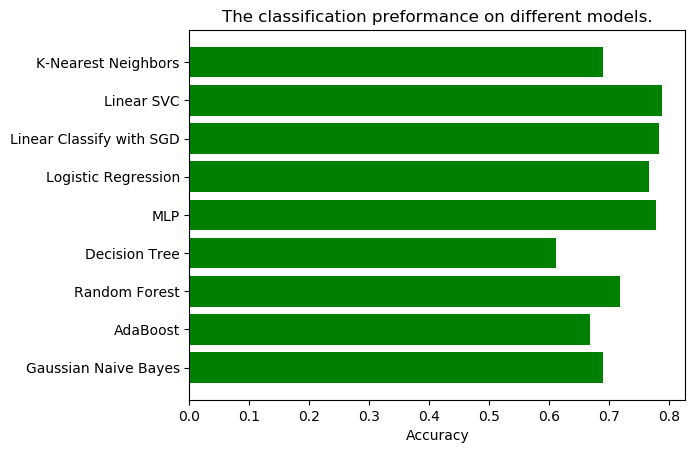

In [6]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

models = classifiers.keys()
y_pos = np.arange(len(models))
performance = [0.6895, 0.7880, 0.7833, 0.7664, 0.7777, 0.6107, 0.7186, 0.6689, 0.6895]

ax.barh(y_pos, performance, align='center',color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('The classification preformance on different models.')

plt.show()